In [146]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

import math  # Import the math module

from IPython.display import HTML, display
import glob


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from datetime import datetime


from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

In [88]:


# Assuming there is a CSV file for the US data in the specified directory
files = [i for i in glob.glob('../input/US_youtube_trending_data.{}'.format('csv'))]
dfs = []

# Iterate through each CSV file
for csv in files:
    # Read the CSV file
    df = pd.read_csv(csv)
    
    # Extract the country code from the file name
    country_code = csv[9:11]
    
    # Add a 'country' column to the DataFrame
    df['country'] = country_code
    
    # Append the DataFrame to the list
    if country_code == 'US':
        dfs.append(df)

# Concatenate all DataFrames in the list
my_df = pd.concat(dfs)

# Print the length of the concatenated DataFrame
print(len(my_df))

# Drop rows with NaN values in the 'likes' column
my_df.dropna(subset=['likes'], inplace=True)

# Drop rows with any NaN values in other columns
my_df = my_df.dropna()

# Convert the 'view_count' column to integer type
to_int = ['view_count']
for column in to_int:
    my_df[column] = my_df[column].astype(int)

# Drop duplicates based on the 'video_id', keeping the last occurrence and sorting by 'view_count'
my_df = my_df.drop_duplicates('video_id', keep='last').sort_values('view_count', ascending=False)

# Print the first few rows of the DataFrame
print(my_df.head())



13061
          video_id                          title           publishedAt  \
4352   KrLj6nc516A        $1 Vs $100,000,000 Car!  2023-09-16T16:00:01Z   
7170   3OFj6l2tQ9s   World's Most Dangerous Trap!  2023-10-07T16:00:00Z   
10379  3ryID_SwU5E      $1 vs $100,000,000 House!  2023-10-14T16:00:00Z   
13033  mwKJfNYwvm8    I Built 100 Wells In Africa  2023-11-04T16:00:00Z   
11438  QjvpjXdgugA  World’s Deadliest Laser Maze!  2023-10-28T15:59:59Z   

                      channelId channelTitle  categoryId  \
4352   UCX6OQ3DkcsbYNE6H8uQQuVA      MrBeast       24.00   
7170   UCX6OQ3DkcsbYNE6H8uQQuVA      MrBeast       24.00   
10379  UCX6OQ3DkcsbYNE6H8uQQuVA      MrBeast       24.00   
13033  UCX6OQ3DkcsbYNE6H8uQQuVA      MrBeast       24.00   
11438  UCX6OQ3DkcsbYNE6H8uQQuVA      MrBeast       24.00   

              trending_date    tags  view_count      likes  comment_count  \
4352   2023-10-21T00:00:00Z  [None]   154717067 5330307.00      143810.00   
7170   2023-11-04T00:00:00Z 

/var/folders/w8/q35p830s6lbg7f097b_4s4wh0000gn/T/ipykernel_16345/155477698.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(my_df[my_df["comment_count"] < 200000]["comment_count"], kde=False, rug=False,


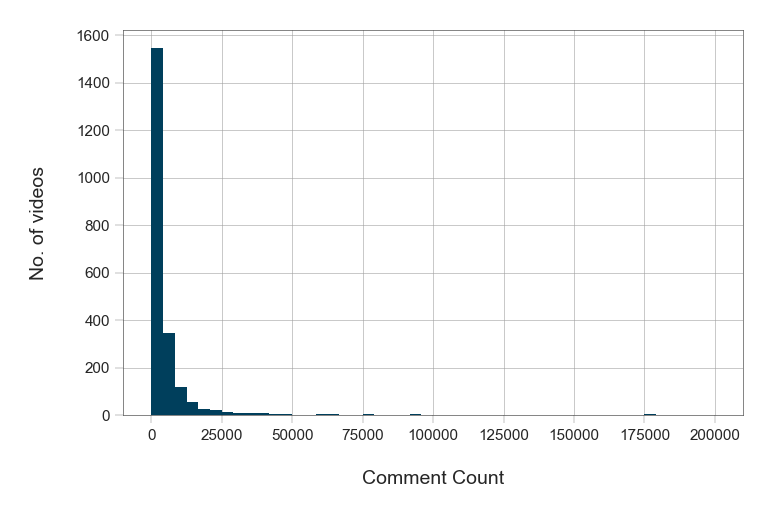

In [89]:
# Define custom plot colors and set the floating-point display format
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format

# Set up Seaborn and Matplotlib plotting style
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

# Create a histogram for comment counts using Seaborn
fig, ax = plt.subplots()
_ = sns.distplot(my_df[my_df["comment_count"] < 200000]["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 2e5, 49), ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")


/var/folders/w8/q35p830s6lbg7f097b_4s4wh0000gn/T/ipykernel_16345/3778148972.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(my_df["title_length"], kde=False, rug=False,


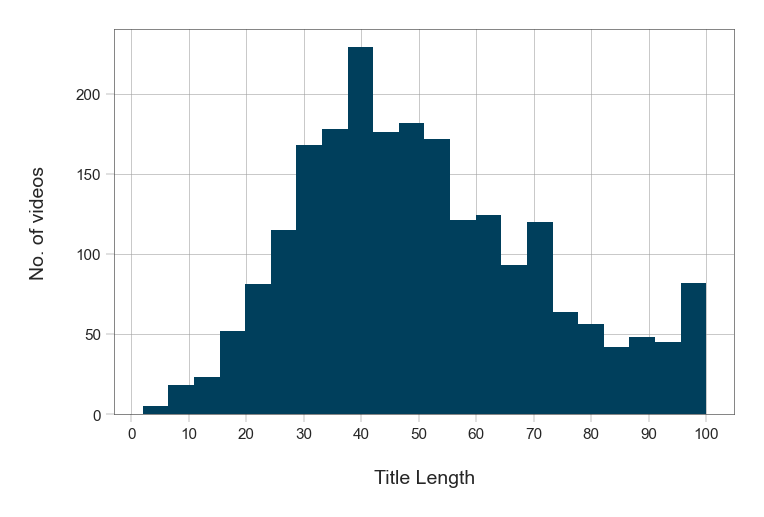

In [90]:
# Create a new column 'title_length' in the DataFrame based on the length of the 'title' column
my_df["title_length"] = my_df["title"].apply(lambda x: len(x))

# Create a subplot and plot a histogram for the title lengths using Seaborn
fig, ax = plt.subplots()
_ = sns.distplot(my_df["title_length"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)

# Set labels for x-axis and y-axis, and customize x-axis tick marks
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))


In [91]:
# my_df["publishing_day"] = my_df['publishedAt'].apply(
#     lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
# my_df["publishing_hour"] = my_df['publishedAt'].apply(lambda x: x[11:13])


# video_counts_per_day = my_df['publishing_day'].value_counts().sort_index()
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Create the plot
# plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
# sns.barplot(x=video_counts_per_day.index, y=video_counts_per_day.values)

# # Add labels and title
# plt.xlabel('Publishing Day')
# plt.ylabel('Count of Videos')
# plt.title('Count of Videos per Publishing Day')
# plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
# plt.show()


In [92]:
# video_counts_per_hour = my_df['publishing_hour'].value_counts().sort_index()
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Create the plot
# plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
# sns.barplot(x=video_counts_per_hour.index, y=video_counts_per_hour.values)

# # Add labels and title
# plt.xlabel('Publishing Hour')
# plt.ylabel('Count of Videos')
# plt.title('Count of Videos per Publishing Hour')
# plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
# plt.show()


In [93]:
# Convert 'categoryId' column to string type
my_df['categoryId'] = my_df['categoryId'].astype(str)

# Create a dictionary 'category_id' to map category IDs to category titles
category_id = {}
with open('../input/US_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        category_id[int(category['id'])] = category['snippet']['title']

# Convert 'categoryId' column to numeric, handling errors by coercing and filling NaN with -1
my_df['categoryId'] = pd.to_numeric(my_df['categoryId'], errors='coerce')
my_df['categoryId'].fillna(-1, inplace=True)

# Convert 'categoryId' column to integer type
my_df['categoryId'] = my_df['categoryId'].astype(int)

# Create a new 'category' column by mapping category IDs to category titles
my_df.insert(4, 'category', my_df['categoryId'].map(category_id))

# Extract unique category titles
category_list = my_df['category'].unique()


In [94]:
my_df.head()

,video_id,title,publishedAt,channelId,category,channelTitle,categoryId,trending_date,tags,view_count,likes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,title_length
4352,KrLj6nc516A,"$1 Vs $100,000,000 Car!",2023-09-16T16:00:01Z,UCX6OQ3DkcsbYNE6H8uQQuVA,Entertainment,MrBeast,24,2023-10-21T00:00:00Z,[None],154717067,5330307.00,143810.00,https://i.ytimg.com/vi/KrLj6nc516A/default.jpg,False,False,I have no idea why the last car was so expensi...,US,23
7170,3OFj6l2tQ9s,World's Most Dangerous Trap!,2023-10-07T16:00:00Z,UCX6OQ3DkcsbYNE6H8uQQuVA,Entertainment,MrBeast,24,2023-11-04T00:00:00Z,[None],146273824,5297398.00,151102.00,https://i.ytimg.com/vi/3OFj6l2tQ9s/default.jpg,False,False,I can’t believe how crazy the last room isGrab...,US,28
10379,3ryID_SwU5E,"$1 vs $100,000,000 House!",2023-10-14T16:00:00Z,UCX6OQ3DkcsbYNE6H8uQQuVA,Entertainment,MrBeast,24,2023-11-20T00:00:00Z,[None],136655670,4604685.00,131376.00,https://i.ytimg.com/vi/3ryID_SwU5E/default.jpg,False,False,I can’t believe how expensive the last house i...,US,25
13033,mwKJfNYwvm8,I Built 100 Wells In Africa,2023-11-04T16:00:00Z,UCX6OQ3DkcsbYNE6H8uQQuVA,Entertainment,MrBeast,24,2023-12-03T00:00:00Z,[None],124101018,8759528.00,204802.00,https://i.ytimg.com/vi/mwKJfNYwvm8/default.jpg,False,False,Click the link below to donate https://www.bea...,US,27
11438,QjvpjXdgugA,World’s Deadliest Laser Maze!,2023-10-28T15:59:59Z,UCX6OQ3DkcsbYNE6H8uQQuVA,Entertainment,MrBeast,24,2023-11-25T00:00:00Z,[None],109440602,3707273.00,84787.00,https://i.ytimg.com/vi/QjvpjXdgugA/default.jpg,False,False,I can’t believe what happened at the end…Drink...,US,29


In [95]:
# grouped_data = my_df.groupby(['category', 'publishing_hour']).size().reset_index(name='count')

# import seaborn as sns
# import matplotlib.pyplot as plt

# # Get unique categories
# categories = grouped_data['category'].unique()

# # Create a plot for each category
# for category in categories:
#     # Filter data for the category
#     category_data = grouped_data[grouped_data['category'] == category]

#     # Create the plot
#     plt.figure(figsize=(10, 6))
#     sns.barplot(x='publishing_hour', y='count', data=category_data)

#     # Add labels and title
#     plt.title(f'Publishing Hour Distribution for {category}')
#     plt.xlabel('Publishing Hour')
#     plt.ylabel('Count of Videos')

#     # Show plot
#     plt.show()


In [96]:
# grouped_data = my_df.groupby(['category', 'publishing_day']).size().reset_index(name='count')

# import seaborn as sns
# import matplotlib.pyplot as plt

# # Get unique categories
# categories = grouped_data['category'].unique()

# # Create a plot for each category
# for category in categories:
#     # Filter data for the category
#     category_data = grouped_data[grouped_data['category'] == category]

#     # Create the plot
#     plt.figure(figsize=(10, 6))
#     sns.barplot(x='publishing_day', y='count', data=category_data)

#     # Add labels and title
#     plt.title(f'Publishing day Distribution for {category}')
#     plt.xlabel('Publishing day')
#     plt.ylabel('Count of Videos')

#     # Show plot
#     plt.show()

In [97]:
df_2 = my_df.copy()

In [98]:
# Define a function to clean the 'trending_date' column
def clean_trending_date(date):
    y, m, d = date.split('T')[0].split('-')
    return datetime.date(int(y), int(m), int(d))

# Apply the clean_trending_date function to the 'trending_date' column
df_2['trending_date'] = df_2['trending_date'].apply(clean_trending_date)

# Reset the index of the DataFrame, sort it based on 'trending_date', drop duplicates, and set 'video_id' as the index again
df_2 = df_2.reset_index().sort_values('trending_date').drop_duplicates('video_id', keep='last').set_index('video_id')


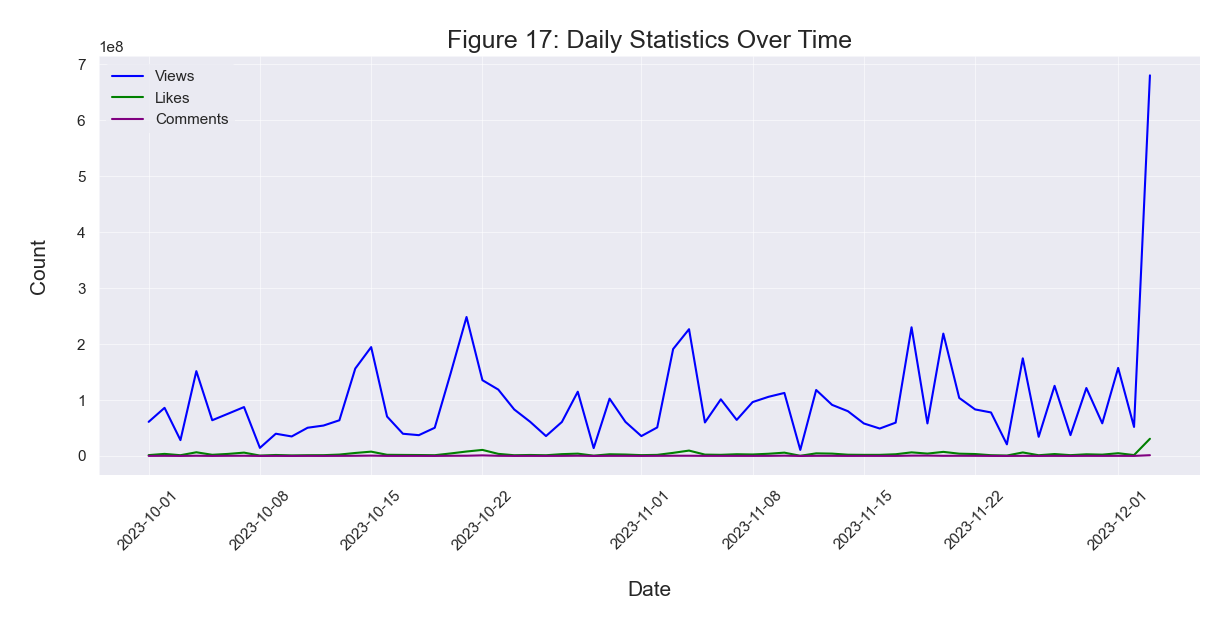

In [99]:
# Group data by 'trending_date' and calculate the sum of 'view_count', 'likes', and 'comment_count' for each date
daily_stats = df_2.groupby('trending_date')[['view_count', 'likes', 'comment_count']].sum()

# Set the style for the plot
sns.set_style("darkgrid")

# Create a figure and axis for the plot
plt.figure(figsize=(12, 6))

# Plot the daily statistics using line plots
plt.plot(daily_stats.index, daily_stats['view_count'], label='Views', color='blue')
plt.plot(daily_stats.index, daily_stats['likes'], label='Likes', color='green')
plt.plot(daily_stats.index, daily_stats['comment_count'], label='Comments', color='purple')

# Set the title and labels for the plot
plt.title('Figure 17: Daily Statistics Over Time', fontsize=18)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Count', fontsize=15)

# Display the legend to differentiate the lines
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout for a cleaner presentation
plt.tight_layout()

# Show the plot
plt.show()


In [100]:
# Function to clean the 'publishedAt' date and return a datetime.date object
def clean_trending_date(date):
    y, m, d = date.split('T')[0].split('-')
    return datetime.date(int(y), int(m), int(d))

# Apply the clean_trending_date function to the 'publishedAt' column in the DataFrame df_2
df_2['published_at'] = df_2['publishedAt'].apply(clean_trending_date)

# Display the first few rows of the DataFrame after the transformation
df_2.head()


,index,title,publishedAt,channelId,category,channelTitle,categoryId,trending_date,tags,view_count,likes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,title_length,published_at
video_id,,,,,,,,,,,,,,,,,,,
tZLpb6Z0Dm0,188,FULL LOCKER ROOM SPEECH AFTER MIAMI DOLPHINS W...,2023-09-24T22:20:57Z,UCHUSfEzpSRkUUsRkk_aJwDw,Sports,Miami Dolphins,17,2023-10-01,[None],315447,5637.00,794.00,https://i.ytimg.com/vi/tZLpb6Z0Dm0/default.jpg,False,False,Mike McDaniel speaks to the team in the locker...,US,61,2023-09-24
_Uvi-FgAsy4,178,Kep1er 케플러 | ‘Galileo’ M/V,2023-09-25T09:00:43Z,UC8whlOg70m2Yr3qSMjUhh0g,Entertainment,Kep1er,24,2023-10-01,Kep1er|케플러|kpop|걸스플래닛|걸스플래닛999|girlsplanet|gir...,23633597,188842.00,19219.00,https://i.ytimg.com/vi/_Uvi-FgAsy4/default.jpg,False,False,Kep1er 케플러 | ‘Galileo’ M/V Kep1er Official Ins...,US,26,2023-09-25
a9tMjCwP-yI,183,Will this toy engine work at full size? (yes),2023-09-25T03:00:00Z,UCEIwxahdLz7bap-VDs9h35A,Science & Technology,Steve Mould,28,2023-10-01,bote pop-pop|botes pop-pop|tamaño real|pop-pop...,1948770,42397.00,2386.00,https://i.ytimg.com/vi/a9tMjCwP-yI/default.jpg,False,False,Visit https://www.janestreet.com/internships/?...,US,45,2023-09-25
xCaC34PV8UM,189,Stephen A. & Shannon Sharpe call the Broncos a...,2023-09-25T15:30:58Z,UCiWLfSweyRNmLpgEHekhoAg,Sports,ESPN,17,2023-10-01,Stephen A Smith|Stephen A Smith First Take|Ste...,976684,16313.00,2591.00,https://i.ytimg.com/vi/xCaC34PV8UM/default.jpg,False,False,"On First Take, Stephen A. Smith and Shannon Sh...",US,85,2023-09-25
D2vj0WcvH5c,194,Tesla Bot Update | Sort & Stretch,2023-09-25T00:30:15Z,UC5WjFrtBdufl6CZojX3D8dQ,Autos & Vehicles,Tesla,2,2023-10-01,tesla|model s|model x|model 3|powerwall|electr...,1146276,39815.00,4516.00,https://i.ytimg.com/vi/D2vj0WcvH5c/default.jpg,False,False,Optimus can now sort objects autonomously � . ...,US,33,2023-09-25


In [101]:
# Calculate engagement rate, comment-to-view ratio, and likes per comment
df_2['engagement_rate'] = (df_2['likes'] + df_2['comment_count']) / df_2['view_count']
df_2['comment_view_ratio'] = df_2['comment_count'] / df_2['view_count']
df_2['likes_per_comment'] = df_2['likes'] / df_2['comment_count']

# Convert 'published_at' to datetime format
df_2['published_at'] = pd.to_datetime(df_2['published_at'], format='%Y-%m-%d')

# Calculate days since publication
df_2['days_since_publication'] = (pd.to_datetime('today') - df_2['published_at']).dt.days

# Calculate likes per day and comments per day
df_2['likes_per_day'] = df_2['likes'] / df_2['days_since_publication']
df_2['comments_per_day'] = df_2['comment_count'] / df_2['days_since_publication']

# Calculate view velocity using log transformation
df_2['view_velocity'] = np.log(df_2['view_count'] + 1) / (df_2['days_since_publication'] + 1)

# Display the first few rows of the updated DataFrame
print(df_2.head())


             index                                              title  \
video_id                                                                
tZLpb6Z0Dm0    188  FULL LOCKER ROOM SPEECH AFTER MIAMI DOLPHINS W...   
_Uvi-FgAsy4    178                         Kep1er 케플러 | ‘Galileo’ M/V   
a9tMjCwP-yI    183      Will this toy engine work at full size? (yes)   
xCaC34PV8UM    189  Stephen A. & Shannon Sharpe call the Broncos a...   
D2vj0WcvH5c    194                  Tesla Bot Update | Sort & Stretch   

                      publishedAt                 channelId  \
video_id                                                      
tZLpb6Z0Dm0  2023-09-24T22:20:57Z  UCHUSfEzpSRkUUsRkk_aJwDw   
_Uvi-FgAsy4  2023-09-25T09:00:43Z  UC8whlOg70m2Yr3qSMjUhh0g   
a9tMjCwP-yI  2023-09-25T03:00:00Z  UCEIwxahdLz7bap-VDs9h35A   
xCaC34PV8UM  2023-09-25T15:30:58Z  UCiWLfSweyRNmLpgEHekhoAg   
D2vj0WcvH5c  2023-09-25T00:30:15Z  UC5WjFrtBdufl6CZojX3D8dQ   

                         category    channelTi

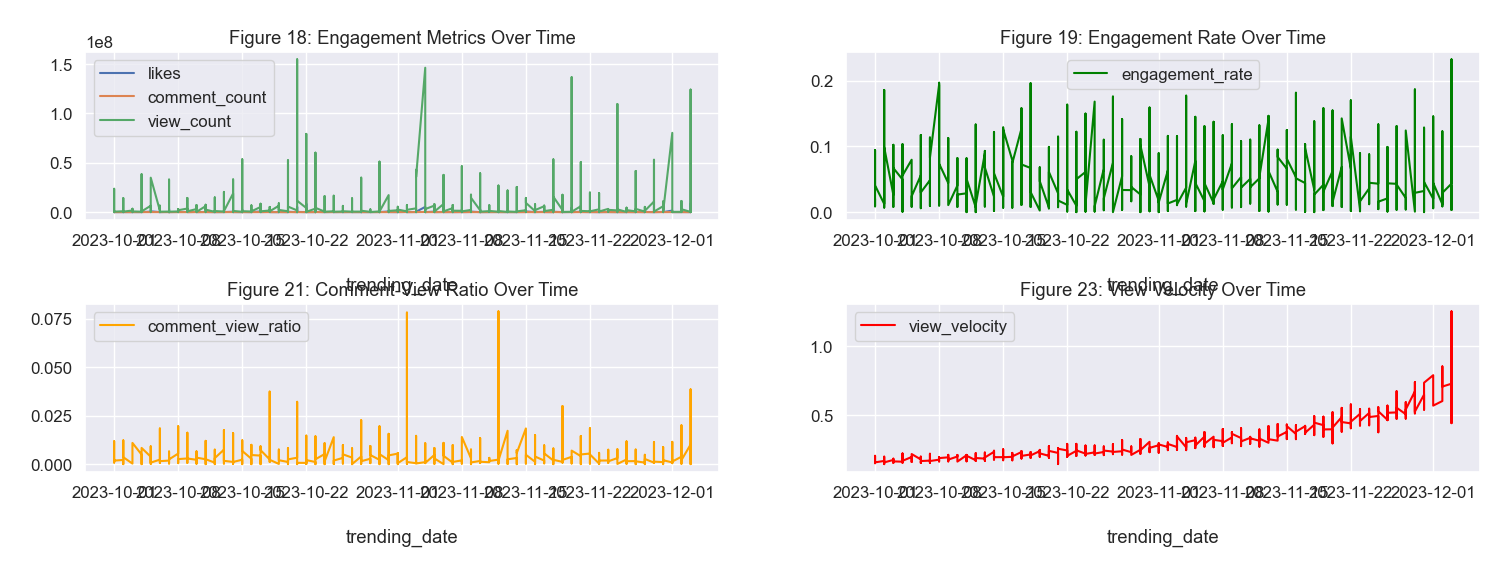

In [102]:
# Set style for plots
sns.set_style("darkgrid")
sns.set(font_scale=1.1)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 5))  # Adjust figsize for spacing

# Plot 1: Engagement Metrics Over Time
df_2.plot(x='trending_date', y=['likes', 'comment_count', 'view_count'], ax=axes[0, 0])
axes[0, 0].set_title('Figure 18: Engagement Metrics Over Time')

# Plot 2: Engagement Rate vs. Time
df_2.plot(x='trending_date', y='engagement_rate', ax=axes[0, 1], color='green')
axes[0, 1].set_title('Figure 19: Engagement Rate Over Time')

# Plot 4: Comment-View Ratio vs. Time
df_2.plot(x='trending_date', y='comment_view_ratio', ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Figure 21: Comment-View Ratio Over Time')

# Plot 6: View Velocity Over Time
df_2.plot(x='trending_date', y='view_velocity', ax=axes[1, 1], color='red')
axes[1, 1].set_title('Figure 23: View Velocity Over Time')

# Adjust spacing for titles
plt.subplots_adjust(top=0.92, bottom=0.08, hspace=0.5)

# Show plots
plt.show()


In [103]:
# Sort the DataFrame by view velocity in descending order and select top 10
top_videos = df_2.sort_values(by='view_velocity', ascending=False).head(10)

# Display the top videos
print("Top 10 Potential Upcoming Trending Videos:")
for index, row in top_videos.iterrows():
    print(f"Title: {row['title']}")
    print(f"Channel: {row['channelTitle']}")
    print(f"Trending Date: {row['trending_date']}")
    print(f"View Velocity: {row['view_velocity']}")
    print("=" * 40)


Top 10 Potential Upcoming Trending Videos:
Title: $10,000 Every Day You Survive In A Grocery Store
Channel: MrBeast
Trending Date: 2023-12-03
View Velocity: 1.2538396504415605
Title: skibidi toilet 68 (part 1)
Channel: DaFuq!?Boom!
Trending Date: 2023-12-03
View Velocity: 1.2044651677230804
Title: Salaar Telugu Trailer | Prabhas | Prashanth Neel | Prithviraj|Shruthi|Hombale Films|Vijay Kiragandur
Channel: Hombale Films
Trending Date: 2023-12-03
View Velocity: 1.159598271507026
Title: ATEEZ(에이티즈) - '미친 폼 (Crazy Form)' Official MV
Channel: KQ ENTERTAINMENT
Trending Date: 2023-12-03
View Velocity: 1.1360814856482835
Title: The Boys – Season 4 Official Teaser Trailer | Prime Video
Channel: Prime Video
Trending Date: 2023-12-03
View Velocity: 1.1078303862883467
Title: Fortnite Battle Royale Chapter 5 Launch Trailer
Channel: Fortnite
Trending Date: 2023-12-03
View Velocity: 1.096569912374337
Title: Fallout - Teaser Trailer | Prime Video
Channel: Prime Video
Trending Date: 2023-12-03
View Vel

/opt/homebrew/opt/ipython/libexec/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/opt/ipython/libexec/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/opt/ipython/libexec/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54000 (\N{HANGUL SYLLABLE TI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/opt/ipython/libexec/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51592 (\N{HANGUL SYLLABLE JEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/opt/ipython/libexec/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) 

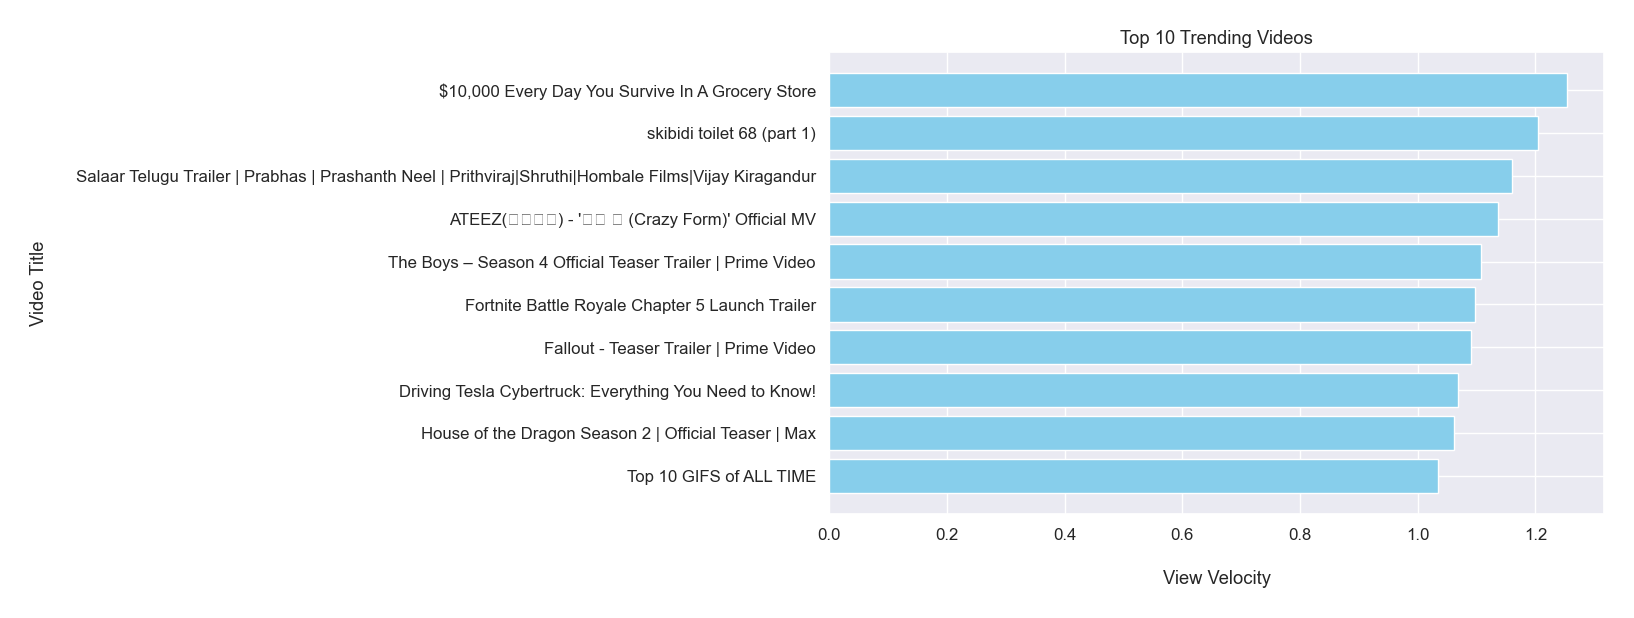

In [104]:
# Sorting the DataFrame by view velocity in descending order and select top 10
top_videos = df_2.sort_values(by='view_velocity', ascending=False).head(10)

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.barh(top_videos['title'], top_videos['view_velocity'], color='skyblue')
plt.xlabel('View Velocity')
plt.ylabel('Video Title')
plt.title('Top 10 Trending Videos')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [106]:
# First, let's copy the dataset so that we don't lose it
df_c = df_2.copy()

# Let's drop 'description' as it won't be necessary for our training
df_c.drop(columns=['description'], inplace=True)

# Display the first 2 rows of the updated DataFrame
df_c.head(n=2)


,index,title,publishedAt,channelId,category,channelTitle,categoryId,trending_date,tags,view_count,...,country,title_length,published_at,engagement_rate,comment_view_ratio,likes_per_comment,days_since_publication,likes_per_day,comments_per_day,view_velocity
video_id,,,,,,,,,,,,,,,,,,,,,
tZLpb6Z0Dm0,188,FULL LOCKER ROOM SPEECH AFTER MIAMI DOLPHINS W...,2023-09-24T22:20:57Z,UCHUSfEzpSRkUUsRkk_aJwDw,Sports,Miami Dolphins,17,2023-10-01,[None],315447,...,US,61,2023-09-24,0.02,0.00,7.10,82,68.74,9.68,0.15
_Uvi-FgAsy4,178,Kep1er 케플러 | ‘Galileo’ M/V,2023-09-25T09:00:43Z,UC8whlOg70m2Yr3qSMjUhh0g,Entertainment,Kep1er,24,2023-10-01,Kep1er|케플러|kpop|걸스플래닛|걸스플래닛999|girlsplanet|gir...,23633597,...,US,26,2023-09-25,0.01,0.00,9.83,81,2331.38,237.27,0.21


In [107]:
# Calculate engagement_rate, like_dislike_ratio, comment_view_ratio, dislikes_per_comment
df_c['engagement_rate'] = (df_c['likes'] + df_c['comment_count']) / (df_c['view_count'] + 1e-6)
df_c['comment_view_ratio'] = df_c['comment_count'] / (df_c['view_count'] + 1e-6)
df_c['days_since_publication'] = (pd.to_datetime(df_c['trending_date']) - pd.to_datetime(df_c['published_at'])).dt.days
df_c['likes_per_day'] = df_c['likes'] / (df_c['days_since_publication']+ 1e-6)
df_c['comments_per_day'] = df_c['comment_count'] / (df_c['days_since_publication']+ 1e-6)
df_c['view_velocity'] = np.log(df_c['view_count'] + 1) / (df_c['days_since_publication'] + 1)

df_c.head(n=2)

,index,title,publishedAt,channelId,category,channelTitle,categoryId,trending_date,tags,view_count,...,country,title_length,published_at,engagement_rate,comment_view_ratio,likes_per_comment,days_since_publication,likes_per_day,comments_per_day,view_velocity
video_id,,,,,,,,,,,,,,,,,,,,,
tZLpb6Z0Dm0,188,FULL LOCKER ROOM SPEECH AFTER MIAMI DOLPHINS W...,2023-09-24T22:20:57Z,UCHUSfEzpSRkUUsRkk_aJwDw,Sports,Miami Dolphins,17,2023-10-01,[None],315447,...,US,61,2023-09-24,0.02,0.00,7.10,7,805.29,113.43,1.58
_Uvi-FgAsy4,178,Kep1er 케플러 | ‘Galileo’ M/V,2023-09-25T09:00:43Z,UC8whlOg70m2Yr3qSMjUhh0g,Entertainment,Kep1er,24,2023-10-01,Kep1er|케플러|kpop|걸스플래닛|걸스플래닛999|girlsplanet|gir...,23633597,...,US,26,2023-09-25,0.01,0.00,9.83,6,31473.66,3203.17,2.43


In [108]:
print(df_c.isna().sum())

index                     0
title                     0
publishedAt               0
channelId                 0
category                  0
channelTitle              0
categoryId                0
trending_date             0
tags                      0
view_count                0
likes                     0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
country                   0
title_length              0
published_at              0
engagement_rate           0
comment_view_ratio        0
likes_per_comment         9
days_since_publication    0
likes_per_day             0
comments_per_day          0
view_velocity             0
dtype: int64


In [109]:
# df_c.drop(columns=['dislikes_per_comment','like_dislike_ratio'], inplace=True)

In [110]:
# Calculate the median of the 'comments_per_day' column
median_comments_per_day = df_c['likes_per_comment'].median()

# Fill missing values with the median
df_c['likes_per_comment'].fillna(median_comments_per_day, inplace=True)

In [114]:
# Selecting features for training
features = ['view_count', 'likes', 'comment_count', 'engagement_rate', 
            'comment_view_ratio', 'days_since_publication', 'likes_per_day', 
            'comments_per_day']

# Split the data into features and target variable
# Define the cutoff date (December 1st)
cutoff_date = datetime(2023, 12, 1)

# Filter data before and after the cutoff date
before_cutoff_data = df_c[df_c['published_at'] < cutoff_date]
prediction_data = df_c[df_c['published_at'] >= cutoff_date]

# Split the data into training and testing sets
train_data, test_data = train_test_split(before_cutoff_data, test_size=0.3, random_state=42)

# Separate features and target variable for training
X_train = train_data[features]
y_train = train_data['view_velocity']

# Separate features for testing
X_test = test_data[features]

# Initialize and train the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=132, random_state=0)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Extract the 'view_velocity' column from test_data
y_test = test_data['view_velocity']


In [115]:
# Check for infinity values in X_train
inf_mask = np.isinf(X_train)
inf_columns = X_train.columns[inf_mask.any()]

# Check for very large values in X_train
large_mask = np.abs(X_train) > 1e10
large_columns = X_train.columns[large_mask.any()]

print("Features with infinity values:", inf_columns)
print("Features with very large values:", large_columns)

Features with infinity values: Index([], dtype='object')
Features with very large values: Index(['likes_per_day'], dtype='object')


Mean Squared Error: 0.0004878416837471117
Root Mean Squared Error: 0.022087138423687022
Mean Absolute Error: 0.00486183701563145
Explained Variance Score: 0.9973695022326886


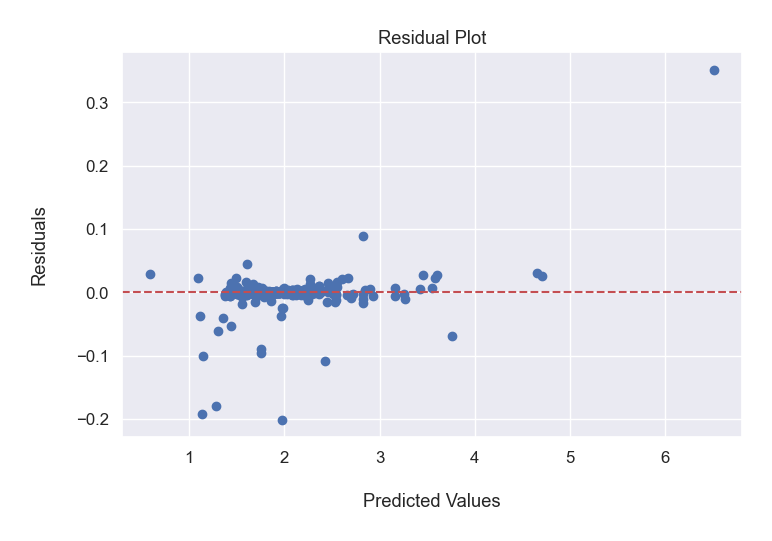

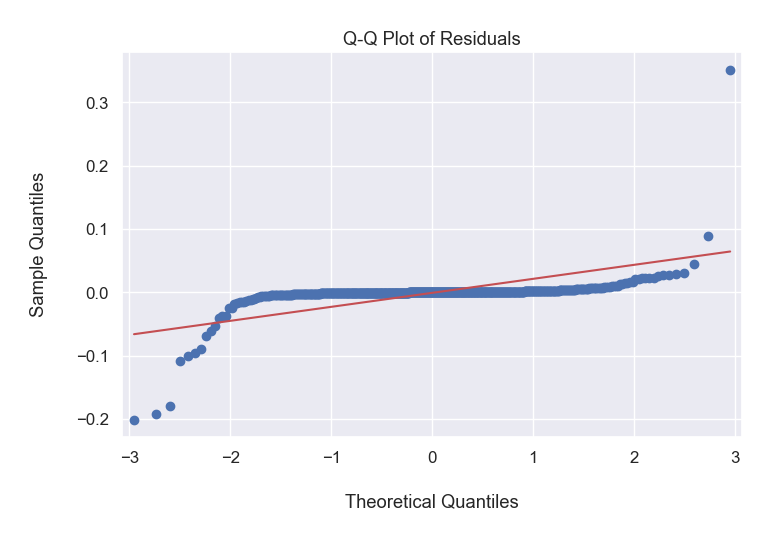

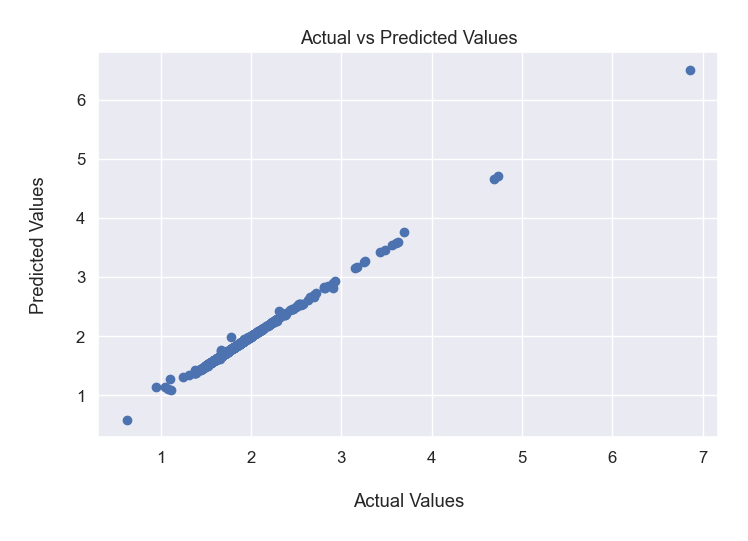

In [116]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Explained Variance Score
evs = explained_variance_score(y_test, y_pred)
print("Explained Variance Score:", evs)

# Plot Residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Quantile-Quantile (Q-Q) Plot of Residuals
import statsmodels.api as sm
qqplot = sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Visualize Predicted vs Actual Values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [117]:
# Select features for testing
X_test = test_data[features]

# Make predictions on the test data
y_pred = model.predict(X_test)

# Create a DataFrame to store the predicted results
prediction_results = pd.DataFrame({'Title': test_data['title'], 
                                   'Channel': test_data['channelTitle'],
                                   'Trending Date': test_data['trending_date'],
                                   'Actual View Velocity': test_data['view_velocity'],
                                   'Predicted View Velocity': y_pred})

# Display the prediction results
# print(prediction_results)

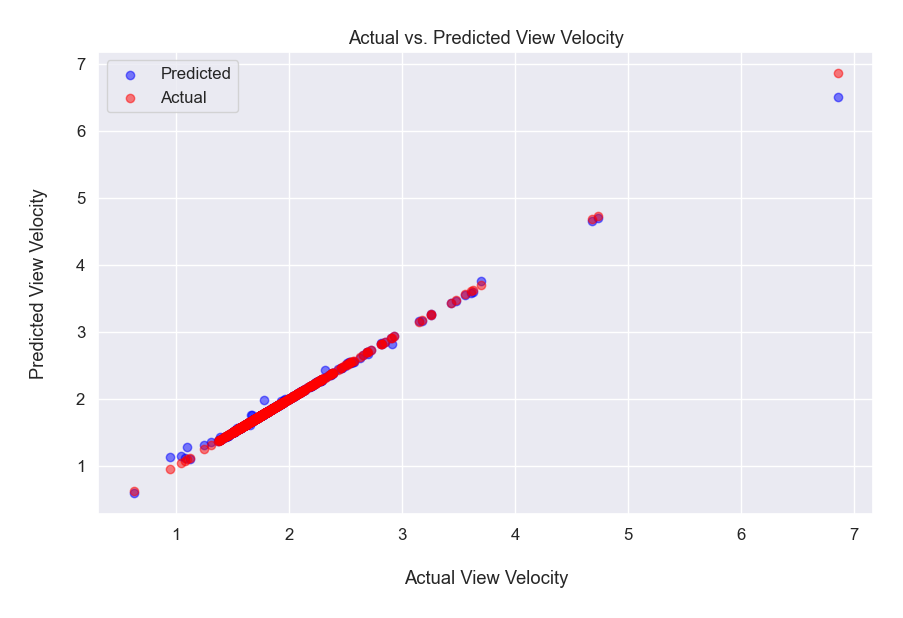

In [118]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(prediction_results['Actual View Velocity'], prediction_results['Predicted View Velocity'], color='blue', label='Predicted', alpha=0.5)
plt.scatter(prediction_results['Actual View Velocity'], prediction_results['Actual View Velocity'], color='red', label='Actual', alpha=0.5)
plt.title('Actual vs. Predicted View Velocity')
plt.xlabel('Actual View Velocity')
plt.ylabel('Predicted View Velocity')
plt.legend()
plt.grid(True)
plt.show()

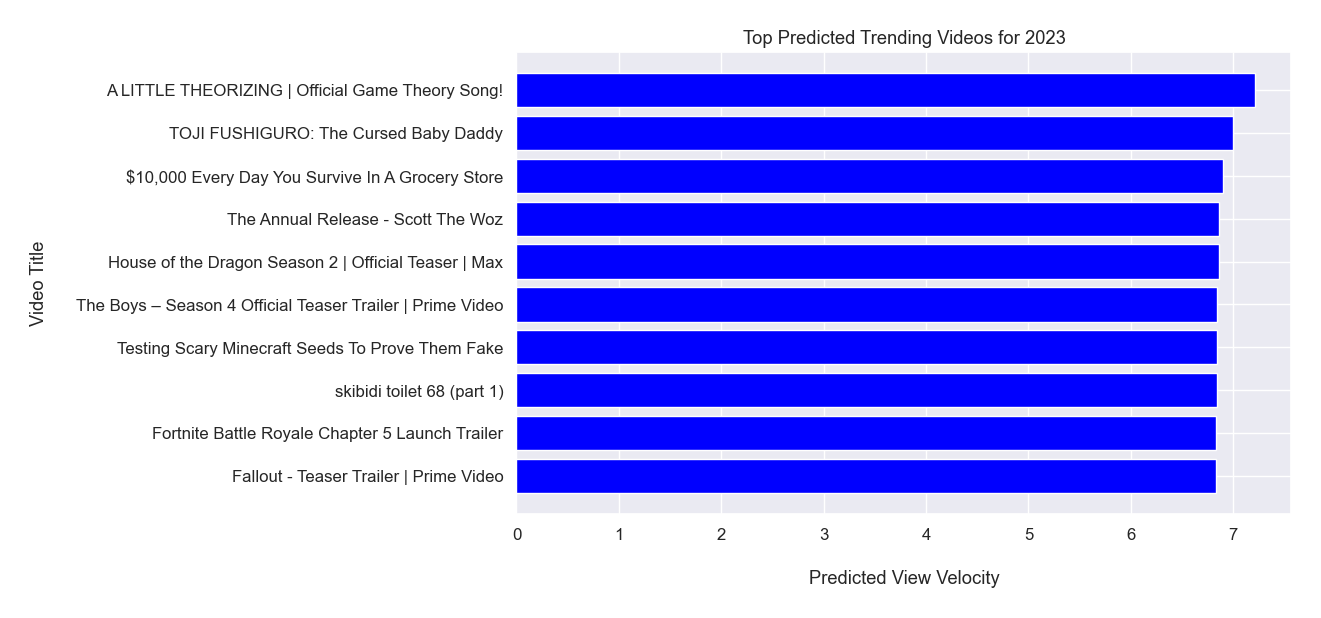

In [119]:
# Select features for prediction
X_pred = prediction_data[features]

# Make predictions on the prediction data
predictions = model.predict(X_pred)

# Combine the predictions with video information
prediction_results = pd.DataFrame({'Title': prediction_data['title'], 'Channel': prediction_data['channelTitle'],
                                   'Published Date': prediction_data['publishedAt'], 'Trending Date': pd.to_datetime('2023-01-01'),
                                   'Predicted View Velocity': predictions})

# Sort the prediction results by predicted view velocity in descending order
prediction_results = prediction_results.sort_values(by='Predicted View Velocity', ascending=False)

# Visualize the top predicted videos
plt.figure(figsize=(10, 6))
plt.barh(prediction_results['Title'][:10], prediction_results['Predicted View Velocity'][:10], color='blue')
plt.xlabel('Predicted View Velocity')
plt.ylabel('Video Title')
plt.title('Top Predicted Trending Videos for 2023')
plt.gca().invert_yaxis()
plt.show()

In [120]:
#trending days prediction

# Get a list of file paths for YouTube trending data in the US
files = [i for i in glob.glob('../input/US_youtube_trending_data.{}'.format('csv'))]

# Initialize an empty list to store DataFrames
dfs = list()

# Loop through each CSV file, read it, and append to the list
for csv in files:
    df = pd.read_csv(csv)
    # Add a 'country' column based on the file name
    df['country'] = csv[9:11]
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
tmy_df = pd.concat(dfs)


# Drop rows with null values in the 'likes' column
tmy_df.dropna(subset=['likes'], inplace=True)

# Drop any remaining null values in the DataFrame
tmy_df = tmy_df.dropna()

# Convert 'view_count' column to integer
to_int = ['view_count']
for column in to_int:
    tmy_df[column] = tmy_df[column].astype(int)


# Convert 'categoryId' column to string
tmy_df['categoryId'] = tmy_df['categoryId'].astype(str)

# Create a dictionary mapping category IDs to category names
category_id = {}
with open('../input/US_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        category_id[int(category['id'])] = category['snippet']['title']

# Convert 'categoryId' to numeric, fill NaN with -1, and convert to integer
tmy_df['categoryId'] = pd.to_numeric(tmy_df['categoryId'], errors='coerce')
tmy_df['categoryId'].fillna(-1, inplace=True)
tmy_df['categoryId'] = tmy_df['categoryId'].astype(int)

# Insert a new 'category_name' column based on the mapping
tmy_df.insert(4, 'category_name', tmy_df['categoryId'].map(category_id))

# Get unique category names
category_list = tmy_df['category_name'].unique()



In [121]:
len(tmy_df)

12761

In [124]:
def isEnglish(s):
    # Check if the input is a string
    if isinstance(s, str):
        try:
            # Attempt to encode the string to ASCII
            s.encode('ascii')
            # If successful, the string is in English
            return True
        except UnicodeEncodeError:
            # If encoding fails, the string contains non-English characters
            return False
    # If the input is not a string, consider it as non-English
    return False  # Handle non-string values as non-English


In [125]:
def removeNonEnglishWords(text):
    # Check if the input text is NaN (a float value)
    if isinstance(text, float) and math.isnan(text):
        return ""  # Return an empty string for NaN values
    
    # Initialize an empty list to store filtered words
    filteredText = []
    
    # Iterate over each word in the text after converting it to a string
    for word in str(text).split():
        # Check if the word is in English using the previously defined isEnglish function
        if isEnglish(word):
            # If the word is in English, add it to the filteredText list
            filteredText.append(word)
    
    # Join the filtered words into a string with space as a separator
    return " ".join(filteredText)


In [126]:
# Apply the isEnglish function to the 'description' column and create a new 'isEnglish' column
tmy_df['isEnglish'] = tmy_df['description'].apply(lambda s: isEnglish(s))

# Count the occurrences of True and False in the 'isEnglish' column
print(tmy_df['isEnglish'].value_counts())


isEnglish
False    8501
True     4260
Name: count, dtype: int64


In [127]:
# Apply the removeNonEnglishWords function to the 'description' column
tmy_df['des'] = tmy_df.description.apply(removeNonEnglishWords)

# Display a sample of 5 rows, showing both the original 'description' and the modified 'des'
print(tmy_df[['description', 'des']].sample(5))


                                             description  \
8235   Red Velvet's 3rd album Chill Kill will be rele...   
1649   Lyrical Lemonade Presents:Drake - Another Late...   
8320   Watch Minnesota Vikings Head Coach Kevin O'Con...   
2166   Absolute madness to close out Smackdown. WWE S...   
11692  i'm lactose intolerant and feel like playing w...   

                                                     des  
8235   Red Velvet's 3rd album Chill Kill will be rele...  
1649   Lyrical Lemonade Presents:Drake - Another Late...  
8320   Watch Minnesota Vikings Head Coach Kevin O'Con...  
2166   Absolute madness to close out Smackdown. WWE S...  
11692  i'm lactose intolerant and feel like playing w...  


In [128]:
# Drop 'description' and 'isEnglish' columns
tmy_df.drop(columns=['description', 'isEnglish'], axis=1, inplace=True)

# Add a new 'isEnglish' column based on the English language check for the 'tags' column
tmy_df['isEnglish'] = tmy_df.tags.apply(lambda s: isEnglish(s))

# Count the number of tags with non-English characters
non_english_tags_count = tmy_df[tmy_df.isEnglish == False].tags.count()

# Display the result
print("Number of tags with non-English characters:", non_english_tags_count)


Number of tags with non-English characters: 1232


1232

In [131]:
# Create a new column 'c_tags' by applying the 'removeNonEnglishWords' function to 'tags'
tmy_df['c_tags'] = tmy_df.tags.apply(removeNonEnglishWords)

# Drop columns 'isEnglish' and 'tags' from 'tmy_df'
tmy_df.drop(columns=['isEnglish', 'tags'], axis=1, inplace=True)

# Add 'isEnglish' column to 'tmy_df' based on 'title' and count non-English titles
tmy_df['isEnglish'] = tmy_df.title.apply(lambda s: isEnglish(s))
tmy_df[tmy_df.isEnglish == False].title.count()

# Create a new column 'c_title' by applying the 'removeNonEnglishWords' function to 'title'
tmy_df['c_title'] = tmy_df.title.apply(removeNonEnglishWords)

# Drop columns 'isEnglish' and 'title' from 'tmy_df'
tmy_df.drop(columns=['isEnglish', 'title'], axis=1, inplace=True)

# Add 'isEnglish' column to 'tmy_df' based on 'channelTitle' and count non-English channel titles
tmy_df['isEnglish'] = tmy_df.channelTitle.apply(lambda s: isEnglish(s))
tmy_df[tmy_df.isEnglish == False].channelTitle.count()

# Create a new column 'channel_title' by applying the 'removeNonEnglishWords' function to 'channelTitle'
tmy_df['channel_title'] = tmy_df.channelTitle.apply(removeNonEnglishWords)

# Drop columns 'channelTitle' and 'isEnglish' from 'tmy_df'
tmy_df.drop(columns=['channelTitle', 'isEnglish'], axis=1, inplace=True)

# Remove links from the 'description'
tmy_df.des = tmy_df.des.str.replace('http\S+|www.\S+', '', regex=True).str.replace('\r+', '', regex=True).str.lower()

# Remove punctuation from 'description'
tmy_df.des = tmy_df.des.str.replace(r'[^\w\s]+', '')

# Replace '|' from 'c_tags' with a space and convert the text to lowercase
tmy_df.c_tags = tmy_df.c_tags.str.replace('|', ' ').str.lower()

# Remove punctuation, if any, from 'c_tags'
tmy_df.c_tags = tmy_df.c_tags.str.replace(r'[^\w\s]+', '')

# Replace 'None' in 'c_tags' with an empty string
tmy_df.c_tags = tmy_df.c_tags.str.replace('none', '')

# Replace '|' from 'c_title' with a space and convert the text to lowercase
tmy_df.c_title = tmy_df.c_title.str.replace('|', ' ').str.lower()

# Remove links from 'c_title'
tmy_df.c_title = tmy_df.c_title.str.replace('http\S+|www.\S+', '', regex=True).str.replace('\r+', '', regex=True).str.lower()

# Remove punctuation from 'c_title'
tmy_df.c_title = tmy_df.c_title.str.replace(r'[^\w\s]+', '')

# Replace '|' from 'channel_title' with a space
tmy_df.channel_title = tmy_df.channel_title.str.replace('|', ' ')

# Remove punctuation, if any, from 'channel_title'
tmy_df.channel_title = tmy_df.channel_title.str.replace(r'[^\w\s]+', '')

# Convert 'publishedAt' and 'trending_date' to datetime and remove time zone information
tmy_df['publishedAt'] = pd.to_datetime(tmy_df.publishedAt)
tmy_df['publishedAt'] = tmy_df['publishedAt'].dt.tz_convert(None)
tmy_df['trending_date'] = pd.to_datetime(tmy_df.trending_date)
tmy_df['trending_date'] = tmy_df['trending_date'].dt.tz_convert(None)

# Convert 'country' to a categorical variable
tmy_df['country'] = tmy_df['country'].astype('category')

# Rename columns for consistency
tmy_df.rename(columns={"publishedAt": "published_at", "categoryId": "category_id",
                   'des': 'description', 'c_tags': 'tags', 'c_title': 'video_title'}, inplace=True)

# Drop rows where 'likes' are greater than 'view_count'
tmy_df.drop(tmy_df[tmy_df.likes > tmy_df.view_count].index, inplace=True)

# Reset index and set 'video_id' as the index
tmy_df.reset_index(drop=True, inplace=True)
tmy_df.set_index('video_id', inplace=True)

# Save the cleaned DataFrame to a CSV file
tmy_df.to_csv('Clean_Dataset_final.csv.zip')

# Reset index
tmy_df.reset_index(inplace=True)

# Drop duplicate rows based on 'video_id' and keep the last occurrence
tmy_df = tmy_df.drop_duplicates(subset=['video_id'], keep='last')

# Group by 'trending_date' and 'category_name' to get the sum of 'view_count'
df_US_category_counts = tmy_df.groupby(['trending_date', 'category_name'], as_index=False)['view_count'].sum()


KeyError: "['isEnglish'] not found in axis"

In [132]:
# To increase the figure size
plt.rcParams['figure.figsize'] = [10, 5]

# Import necessary libraries for word cloud generation
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Adding unwanted words and social media tags to the stopword list
stopwords = set(STOPWORDS)
stopwords.update(['follow', 'twitter', 'social', 'instagram', 'subscribe', 'snapchat', 'youtube', 'videos', 'video', \
                  'channel', 'share', 'facebook', 'comment', 'like', 'take', 'go', 'got', 'back', \
                  'much', 'made', 'keep', 'watch', 'none', 'check', 'will', 'make'])

# Function to generate word cloud
def generate_wordcloud(text, stop_words):
    # Create a WordCloud object with specified parameters
    wordcloud = WordCloud(stopwords=stop_words, max_font_size=50, max_words=150, background_color="white").generate(text)
    
    # Plot the word cloud
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


In [133]:
# Read the preprocessed dataset
ml_df = pd.read_csv('Clean_Dataset_final.csv.zip')

# Keep only the last entry for each video_id (latest data)
ml_df.drop_duplicates(subset=['video_id'], keep='last', inplace=True)

# Drop unnecessary columns for text classification
ml_df.drop(columns=['channel_title', 'video_id', 'published_at', 'category_id', 'trending_date', \
                    'view_count', 'likes', 'comment_count', 'country'], axis=1, inplace=True)

# Fill NaN values with empty strings
ml_df.fillna(value='', inplace=True)

# Combine text columns into a single column 'All_text'
ml_df['All_text'] = ml_df.description + ' ' + ml_df.tags + ' ' + ml_df.video_title

# Drop individual text columns
ml_df.drop(columns=['description', 'tags', 'video_title'], axis=1, inplace=True)

# Import PorterStemmer from NLTK for text preprocessing
from nltk.stem import PorterStemmer

# Define a function for text preprocessing (stemming and stopword removal)
def preprocessing(text):
    stemmer = PorterStemmer()
    processed_text = ''
    for word in text.split():
        if not word in stopwords:
            processed_text += stemmer.stem(word) + " "

    return processed_text

# Apply the preprocessing function to 'All_text' column
ml_df['All_text'] = ml_df['All_text'].apply(preprocessing)

# Import necessary libraries for text classification
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

# Filter the dataset for specific categories
df_filtered = ml_df[ml_df.category_name.isin(['Entertainment', 'Sports', 'Music', 'Gaming', \
                                              'People & Blogs', 'Comedy', 'News & Politics'])]

# Define features (X) and target variable (Y)
X = df_filtered.All_text
Y = df_filtered.category_name

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Applying bag of words to features in training and testing data
bag_of_words_creator = CountVectorizer()
X_train_bow = bag_of_words_creator.fit_transform(X_train)
X_test_bow = bag_of_words_creator.transform(X_test)

# Initialize and train the RandomForestClassifier model
cl = RandomForestClassifier(random_state=0)
cl.fit(X_train_bow, Y_train)

# Make predictions on the test data
y_pred = cl.predict(X_test_bow)

# Evaluate the model using confusion matrix
from sklearn.metrics import confusion_matrix
import sklearn.metrics as met
confusion_matrix(Y_test, y_pred)


array([[ 10,   9,   3,   0,   0,   1,   0],
       [  0,  90,  12,  15,   0,   3,   6],
       [  0,   8, 112,   3,   0,   0,   2],
       [  0,   1,   1,  90,   0,   0,   0],
       [  0,   8,   0,   4,   7,   0,   2],
       [  2,  19,   3,   6,   0,  18,   3],
       [  0,   4,   2,   2,   0,   0, 103]])

In [134]:
# Import the classification report function from sklearn.metrics
from sklearn.metrics import classification_report

# Print the classification report, which includes precision, recall, and f1-score for each category
print(classification_report(Y_test, y_pred))

# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Calculate accuracy using accuracy_score
accuracy = accuracy_score(Y_test, y_pred)

# Format accuracy as a percentage with two decimal places
formatted_accuracy = "{:.2f}%".format(accuracy * 100)

# Print the formatted accuracy
print("Accuracy: " + formatted_accuracy)


                 precision    recall  f1-score   support

         Comedy       0.83      0.43      0.57        23
  Entertainment       0.65      0.71      0.68       126
         Gaming       0.84      0.90      0.87       125
          Music       0.75      0.98      0.85        92
News & Politics       1.00      0.33      0.50        21
 People & Blogs       0.82      0.35      0.49        51
         Sports       0.89      0.93      0.91       111

       accuracy                           0.78       549
      macro avg       0.83      0.66      0.70       549
   weighted avg       0.79      0.78      0.77       549

Accuracy: 78.32%


In [136]:
# Import the TfidfVectorizer from sklearn.feature_extraction.text
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer instance
tfidf_creator = TfidfVectorizer()

# Transform the training data using TF-IDF vectorization
X_train_tfidf = tfidf_creator.fit_transform(X_train)

# Transform the test data using the same vectorizer
X_test_tfidf = tfidf_creator.transform(X_test)

# Initialize a RandomForestClassifier with a specified random seed
cl = RandomForestClassifier(random_state=0)

# Train the RandomForestClassifier using the TF-IDF transformed training data
cl.fit(X_train_tfidf, Y_train)

# Make predictions on the test data
y_pred = cl.predict(X_test_tfidf)

# Generate a confusion matrix to evaluate model performance
conf_matrix = confusion_matrix(Y_test, y_pred)
conf_matrix

array([[ 10,  11,   2,   0,   0,   0,   0],
       [  0,  93,  12,  15,   0,   1,   5],
       [  0,   8, 113,   2,   0,   0,   2],
       [  0,   1,   1,  90,   0,   0,   0],
       [  0,   9,   0,   4,   6,   0,   2],
       [  1,  20,   4,   6,   0,  18,   2],
       [  0,   4,   1,   2,   0,   0, 104]])

In [137]:
# Import the classification report function from sklearn.metrics
from sklearn.metrics import classification_report

# Print the classification report, which includes precision, recall, and f1-score for each category
print(classification_report(Y_test, y_pred))

# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Calculate accuracy using accuracy_score
accuracy = accuracy_score(Y_test, y_pred)

# Format accuracy as a percentage with two decimal places
formatted_accuracy = "{:.2f}%".format(accuracy * 100)

# Print the formatted accuracy
print("Accuracy: " + formatted_accuracy)


                 precision    recall  f1-score   support

         Comedy       0.91      0.43      0.59        23
  Entertainment       0.64      0.74      0.68       126
         Gaming       0.85      0.90      0.88       125
          Music       0.76      0.98      0.85        92
News & Politics       1.00      0.29      0.44        21
 People & Blogs       0.95      0.35      0.51        51
         Sports       0.90      0.94      0.92       111

       accuracy                           0.79       549
      macro avg       0.86      0.66      0.70       549
   weighted avg       0.81      0.79      0.77       549

Accuracy: 79.05%


In [138]:
# GOAL: To construct a Machine learning model to predict how many more days a video will trend given views,likes,dislikes,comment_count, published date and trending day number

In [139]:
df = pd.read_csv('Clean_Dataset_final.csv.zip')

# Group the DataFrame by selected columns and aggregate using the maximum value for each group
ML_df = df.groupby(['video_id', 'trending_date', 'published_at'], as_index=False).agg({
    'view_count': 'max',
    'likes': 'max',
    'comment_count': 'max'
})

# Create a copy of the DataFrame ML_df for further processing
df1 = ML_df.copy()

# Convert 'trending_date' and 'published_at' columns to datetime format
df1['trending_date'] = pd.to_datetime(df1['trending_date'])
df1['published_at'] = pd.to_datetime(df1['published_at'])


DecisionTreeRegressor(max_depth=2)

In [140]:
# Create a new column 'trending_day_no' representing the rank of 'trending_date' within each 'video_id' group
df1['trending_day_no'] = df1.groupby(['video_id'])["trending_date"].rank('first', ascending=True)

# Count the total number of trending days for each 'video_id'
df1_count = df1.groupby('video_id', as_index=False)["trending_date"].count().rename(columns={
    'trending_date': 'total_trending_days'
})

# Merge the count information back into the original DataFrame based on 'video_id'
df2 = df1.merge(df1_count, left_on='video_id', right_on='video_id')

# Extract various time-related features from the 'published_at' column
df2['published_year'] = df2.published_at.dt.year
df2['published_month'] = df2.published_at.dt.month
df2['published_day'] = df2.published_at.dt.day
df2['published_hour'] = df2.published_at.dt.hour
df2['published_minute'] = df2.published_at.dt.minute

# Drop columns 'video_id', 'trending_date', and 'published_at' as they are no longer needed
df2.drop(columns=['video_id', 'trending_date', 'published_at'], inplace=True) 

# Separate the features (X) and the target variable (Y)
X = df2.drop('total_trending_days', axis=1)
Y = df2.total_trending_days

# Import the DecisionTreeRegressor from scikit-learn and initialize the model with a maximum depth of 2
import sklearn.tree
dt = sklearn.tree.DecisionTreeRegressor(max_depth=2)

# Fit the DecisionTreeRegressor model with the features (X) and the target variable (Y)
dt.fit(X, Y)


DecisionTreeRegressor(max_depth=2)

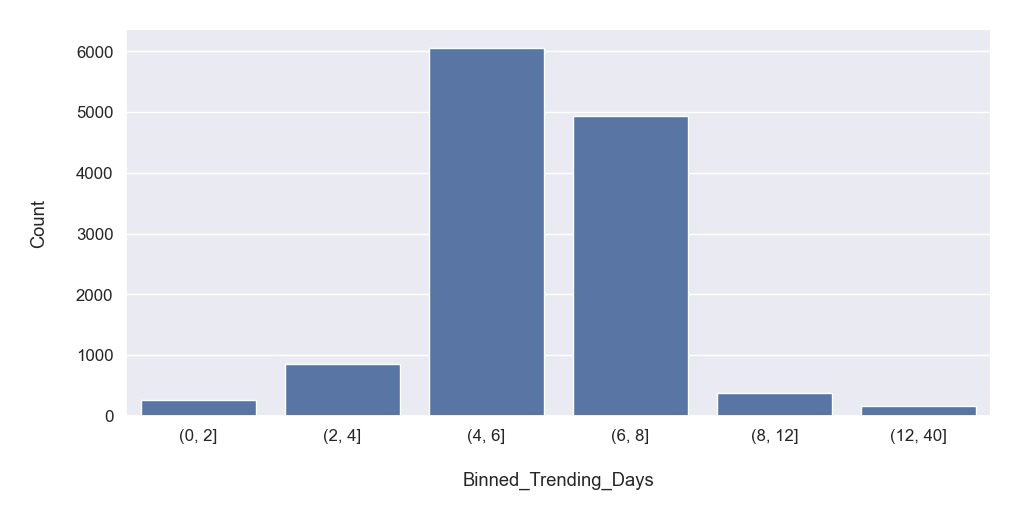

In [141]:
# Bin the total trending days into specified ranges
trending_days_binned = pd.cut(Y, bins=[0, 2, 4, 6, 8, 12, 40])

# Count the occurrences in each bin and create a DataFrame
trending_days_binned_count = trending_days_binned.value_counts().rename_axis('Binned_Trending_Days').reset_index(name='Count')

# Use seaborn to create a categorical plot (bar plot) for the binned trending days
sns.catplot(y='Count', x='Binned_Trending_Days', data=trending_days_binned_count, kind='bar', aspect=2)


In [142]:
# Split the dataset into features (X) and the target variable (Y)
X = df2.drop('total_trending_days', axis=1)
Y = df2.total_trending_days

# Import the 'train_test_split' function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Import the Linear Regression model from sklearn.linear_model
from sklearn import linear_model

# Initialize the Linear Regression model
regr = linear_model.LinearRegression()

# Fit (train) the model using the training data
regr.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = regr.predict(X_test)


In [143]:
print("Coefficients: \n", regr.coef_)
r2_score=sklearn.metrics.r2_score(Y_test, y_pred)
print("Coefficient of determination: %.2f" % r2_score)


Coefficients: 
 [-8.30173582e-09  8.46117970e-07  6.15080010e-06  1.32906803e+00
 -1.33226763e-15 -6.53398532e-01 -4.48086335e-02  3.20919334e-03
 -3.40304611e-03]
Coefficient of determination: 0.61


In [144]:
(y_pred-Y_test).abs().mean()

2.6000941812225857

In [145]:
((y_pred-Y_test)**2).mean()

36.408446876010494

In [147]:
# Creating a list of regression models
regs = [Lasso(), ElasticNet(), DecisionTreeRegressor(), GradientBoostingRegressor(), MLPRegressor()]
 

In [148]:
# Importing necessary modules
from sklearn.model_selection import KFold

# Initializing variables
minMAD = 10000000
nfolds = 3
bestREG = ''

# Iterating through the regression models
for reg in regs:
    # Creating k-fold cross-validation object
    kf = KFold(n_splits=nfolds, random_state=0, shuffle=True)
    
    # Calculating negative mean absolute deviation (MAD) using cross-validation
    mad = sklearn.model_selection.cross_val_score(reg, X, Y, cv=kf, scoring='neg_mean_absolute_error').mean()
    
    # Printing the model and its MAD score
    print(str(reg)[:25] + ' with MAD= ' + str(mad))
    
    # Updating the best model if the current model has a lower MAD
    if mad < minMAD:
        minMAD = mad
        bestREG = reg

# Printing the best model and its MAD score
print('***********************************************')
print('Best Regressor is... ' + str(bestREG)[:25])
print('**********************')
print('With MAD Score ' + str(minMAD))


Lasso() with MAD= -2.668942420355176
ElasticNet() with MAD= -2.66412459840898
DecisionTreeRegressor() with MAD= -0.4429947454884304
GradientBoostingRegressor with MAD= -0.985110903984132
MLPRegressor() with MAD= -177.30668121892782
***********************************************
Best Regressor is... MLPRegressor()
**********************
With MAD Score -177.30668121892782
